# Lab 5 - Classification

## Ex. 1 - kNN - own implementation

Please provide your own implementation of the “K nearest neighbors” algorithm.

Task:

1. Iris database - please divide into training and test sets
2. Find the best value of k for the selected test set (show on the graph change of k and the error - for both the test and training sets)

- We choose the value of k (np. from 1 to n, where n will be the value for which the algorithm's results will deteriorate again)
- For each example in the test set, we look for the k observations that are closest to our analyzed example. Use the Eukleidesa distance to determine the distance.
- The advantage of a given class among the “k” closest neighbors (from the training set) proves that the example belongs to this class.
- Use the most frequent value of the “k” nearest neighbors“ as the value for an unclassified example.
- For each case of k, after classifying all examples in the test set, count the error (e.g. the number of examples wrongly classified to the set size) and write the pair (k - error) to collect data for summary graphs.
3. Suggest the best k for the set. 

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
db_iris = datasets.load_iris()
X = db_iris.data
y = db_iris.target

In [3]:
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = distance.euclidean(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

scores = []
for k in range(1,11):
    predictions = []
    for i in range(len(features_test)):
        prediction = predict_classification(features_train, features_test[i], k)
        predictions = np.append(predictions, prediction)
        predictions = np.array(predictions)
        predictions = np.around(predictions)
        predictions = predictions.astype(int)
    scores.append(accuracy_score(labels_test, predictions))

table = pd.DataFrame({'k value': [k for k in range(1, 11)], 'Accuracy score': scores})
table

,k value,Accuracy score
0,1,0.933333
1,2,0.933333
2,3,0.977778
3,4,0.977778
4,5,0.977778
5,6,0.977778
6,7,0.977778
7,8,0.977778
8,9,0.955556
9,10,0.955556


## Ex. 2 - kNN - Python (sklearn)

Please solve the above problem using the library sklearn.neighbors.KNeighborsClassifier in order to check the correct implementation of the kNN algorithm
Useful libraries and functions:

In [4]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
neighbors = [i for i in range(1, 11)]
sklearn_accuracy_score = []

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(features_train, labels_train)
    y_pred = knn.predict(features_test)
    sklearn_accuracy_score.append(accuracy_score(labels_test, y_pred))

table = {'k value': neighbors, 'Accuracy score': sklearn_accuracy_score}
table = pd.DataFrame(table)
table

,k value,Accuracy score
0,1,0.977778
1,2,0.955556
2,3,0.977778
3,4,0.955556
4,5,0.977778
5,6,0.955556
6,7,0.955556
7,8,0.955556
8,9,0.977778
9,10,0.955556


## Ex.3 - Decision trees

In the scikit-learn library, decision trees are implemented by the class: DecisionTreeClassifier. 

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

Predicting examples to belong to classes:

In [7]:
clf.predict(iris.data[:1, :])

array([0])

or estimating the probability of belonging to classes:

In [8]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

Please illustrate the result using the 'Graphiz' tool and installing the 'pydot' library to python (please do the task at home and generate a '*.png' or '*.pdf' file) 

In [9]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

## Exercise

Classification of handwritten numbers. Images have been normalized to size 20x20px.

The data that we will use is an image converted to a one-dimensional format by arranging successive lines. This data comes from the MNIST handwritten number database.

If you download mnist from another source, make sure it is converted from 28 x 28 px and correctly transposed.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

dane = loadmat('mnist.mat')
 
#Ex.1.Divide the data into parameters X and answer y:
X = dane['trainX']
y = dane['trainY']
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
# y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28

y = y.T

# Ex 2. Please display the number of digits and the number of pixels per image
digits, pixels = X.shape
digits, pixels

(60000, 784)

Auxiliary function plot_mnist to display pictures from the database:

In [11]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Ex. 3. Please display sample digits from the dataset (function plot_mnist).

/Library/Anaconda/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


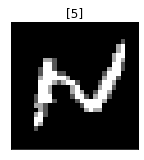

In [12]:
plot_mnist([X[0]], [y[0]], w, h, n_row=1, n_col=1)

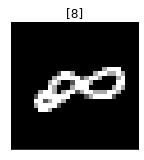

In [13]:
plot_mnist([X[300]], [y[300]], w, h, n_row=1, n_col=1)

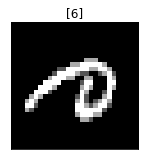

In [14]:
plot_mnist([X[6000]], [y[6000]], w, h, n_row=1, n_col=1)

Ex. 4. Please divide the dataset into learner (70%) and training. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

Ex. 5. Create an instance of the classifier, then train and predict for test data.

In [16]:
dtc = tree.DecisionTreeClassifier(max_depth = 10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

Ex 6. Please provide F1 result, confusion matrix and classification report.

In [17]:
# F1

print("F1 score: {}".format(f1_score(y_test, y_pred, average = None)))

F1 score: [0.90909091 0.93919087 0.77508651 0.78633926 0.82925425 0.74992234
 0.86020914 0.86824233 0.78694158 0.76867133]


Text(0.5, 1.0, 'Confusion matrix')

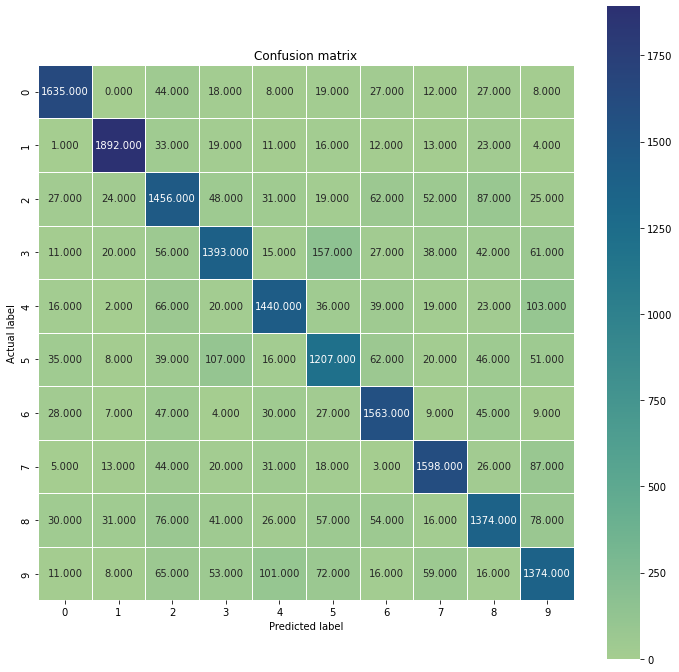

In [18]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix')

In [19]:
from sklearn.metrics import classification_report

# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1798
           1       0.94      0.93      0.94      2024
           2       0.76      0.80      0.78      1831
           3       0.81      0.77      0.79      1820
           4       0.84      0.82      0.83      1764
           5       0.74      0.76      0.75      1591
           6       0.84      0.88      0.86      1769
           7       0.87      0.87      0.87      1845
           8       0.80      0.77      0.79      1783
           9       0.76      0.77      0.77      1775

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000

